[[0 1 0 0 0 0 0 0 0]
 [1 0 1 1 1 0 0 0 0]
 [0 1 0 1 1 0 0 0 0]
 [0 1 1 0 1 0 0 0 0]
 [0 1 1 1 0 1 0 1 0]
 [0 0 0 0 1 0 1 1 0]
 [0 0 0 0 0 1 0 1 0]
 [0 0 0 0 1 1 1 0 1]
 [0 0 0 0 0 0 0 1 0]]


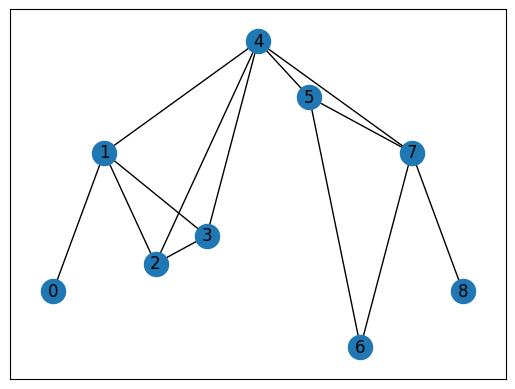

In [1]:
from ts2vg import NaturalVG
import networkx as nx
import matplotlib.pyplot as plt
time = [5, 10, 6, 7, 14, 12, 3, 10, 5]
vg = NaturalVG()
# directed, weighted
vg.build(time)
edges = vg.edges
edges.sort()
# for i in range(len(edges)):
#     # edges[i][0]=edges[i][0]+1
#     # edges[i][1]=edges[i][1]+1
#     print(edges[i][0]+1, end=",")
#     print(edges[i][1]+1)

ft = vg.adjacency_matrix()
print(ft) 

# print((edges))
nxg = vg.as_networkx()

y = vg.node_positions() #node_positions says that first node has how much value, 2nd node has how much value,
# print(y)

nx.draw_networkx(nxg, pos=vg.node_positions())

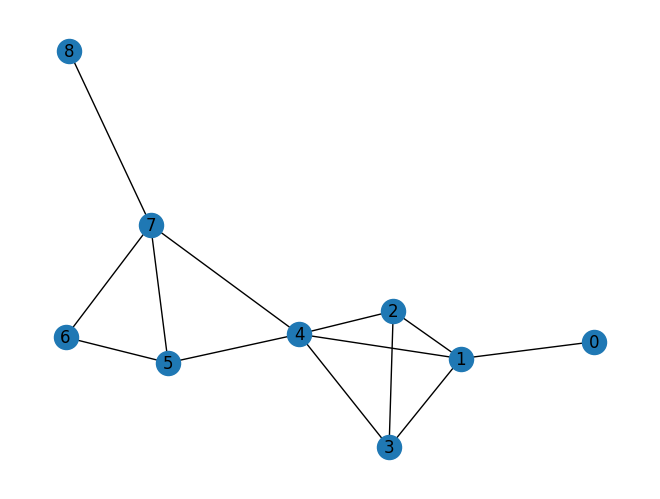

In [2]:
nx.draw_spring(nxg, with_labels=True)

plt.show()

In [3]:
print(nxg.degree())
#finding average degree
d=(dict(nxg.degree()))
l=0;count=0
for i in d:
        count=count+d[i]
        l=l+1
print("average degree", count/l)
#indegree, outdegree for directed graphs

[(0, 1), (1, 4), (2, 3), (3, 3), (4, 5), (5, 3), (7, 4), (6, 2), (8, 1)]
average degree 2.888888888888889


In [4]:
print(nx.shortest_path_length(nxg, 0,5))
print(list(nx.all_shortest_paths(nxg,0,5)))
# nx.draw_networkx()

3
[[0, 1, 4, 5]]


In [5]:
#centrality:closeness centrality (or closeness) of a node is the average length of the shortest path between the node and all other nodes in the graph. 

In [6]:
print(nx.diameter(nxg))
print(nx.density(nxg))
#maximum distance that we need to cover to reach from one node to another

4
0.3611111111111111


In [7]:
nx.average_shortest_path_length(nxg)

1.9722222222222223

In [8]:
print(ft)
print(nx.degree(nxg, ))
print(list(nx.all_neighbors(nxg,1)))
print(list(nxg.nodes()))

[[0 1 0 0 0 0 0 0 0]
 [1 0 1 1 1 0 0 0 0]
 [0 1 0 1 1 0 0 0 0]
 [0 1 1 0 1 0 0 0 0]
 [0 1 1 1 0 1 0 1 0]
 [0 0 0 0 1 0 1 1 0]
 [0 0 0 0 0 1 0 1 0]
 [0 0 0 0 1 1 1 0 1]
 [0 0 0 0 0 0 0 1 0]]
[(0, 1), (1, 4), (2, 3), (3, 3), (4, 5), (5, 3), (7, 4), (6, 2), (8, 1)]
[0, 2, 3, 4]
[0, 1, 2, 3, 4, 5, 7, 6, 8]


In [9]:
import numpy as np
#local random walk
#creating p matrix
axy=vg.adjacency_matrix()
print(type(axy))
p=[]
nodes=list(nxg.nodes())
for i in range(0, len(nodes),1):
        p_row=[]
        for j in range(0,len(nodes),1):
                degree=nx.degree(nxg, i)
                # print(degree)
                p_row.append(axy[i][j]/degree)
        p.append(p_row)
        # p_row=[]
p=np.array(p)
print(p)
#transposing p matrix
pt=p.transpose()
# print(pt)

<class 'numpy.ndarray'>
[[0.         1.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.25       0.         0.25       0.25       0.25       0.
  0.         0.         0.        ]
 [0.         0.33333333 0.         0.33333333 0.33333333 0.
  0.         0.         0.        ]
 [0.         0.33333333 0.33333333 0.         0.33333333 0.
  0.         0.         0.        ]
 [0.         0.2        0.2        0.2        0.         0.2
  0.         0.2        0.        ]
 [0.         0.         0.         0.         0.33333333 0.
  0.33333333 0.33333333 0.        ]
 [0.         0.         0.         0.         0.         0.5
  0.         0.5        0.        ]
 [0.         0.         0.         0.         0.25       0.25
  0.25       0.         0.25      ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.        ]]


In [10]:
print(pt) #transpose of p

[[0.         0.25       0.         0.         0.         0.
  0.         0.         0.        ]
 [1.         0.         0.33333333 0.33333333 0.2        0.
  0.         0.         0.        ]
 [0.         0.25       0.         0.33333333 0.2        0.
  0.         0.         0.        ]
 [0.         0.25       0.33333333 0.         0.2        0.
  0.         0.         0.        ]
 [0.         0.25       0.33333333 0.33333333 0.         0.33333333
  0.         0.25       0.        ]
 [0.         0.         0.         0.         0.2        0.
  0.5        0.25       0.        ]
 [0.         0.         0.         0.         0.         0.33333333
  0.         0.25       0.        ]
 [0.         0.         0.         0.         0.2        0.33333333
  0.5        0.         1.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.25       0.        ]]


In [11]:
#creating pie_x_0 matrix for all nodes. it is a ma
pie_0node_0t=np.array([[1],[0],[0],[0],[0],[0],[0],[0],[0]])
#we want to create a function that can define the pie matrixes at the 0th step
def create_pie(n, position):
        #n is no of nodes
        #for general node
        final=[]
        for i in range(n):
            each=[]
            if (i==position):
                each.append(1)
            else:
                each.append(0)
            final.append(each)
        return final

pie_0_0=create_pie(nx.number_of_nodes(nxg),1)
print(pie_0_0)

[[0], [1], [0], [0], [0], [0], [0], [0], [0]]


In [12]:
#we want to generate this to create pie_0 matrix for all nodes to at t=0
def create_all_pie(n):
    pie_x_0=[] #this means all nodes and at time t=0
    for i in range(n):
        each=create_pie(n, i)
        pie_x_0.append(each)
    return pie_x_0


pie_x_0=create_all_pie(nx.number_of_nodes(nxg)) #for node 0 
# for i in range(nx.number_of_nodes(nxg)):
#     print(pie_x_0[i])

pie_x_0=np.array(pie_x_0)
print(pie_x_0, end="   ")

[[[1]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [1]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [1]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [1]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [1]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [1]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [1]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [1]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [1]]]   

In [13]:
#now we want to create pie matrixes for all nodes at time t=1
# πx  t = PT . πx(t-1) 

#little manual testig
pie_1_1=np.dot(pt,pie_x_0[1])
print(pie_1_1)

[[0.25]
 [0.  ]
 [0.25]
 [0.25]
 [0.25]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]]


In [14]:
pie_x_1=[] #pie matrix for all nodes at t=1
for i in range(nx.number_of_nodes(nxg)):
    each=np.dot(pt,pie_x_0[i])
    pie_x_1.append(each)
pie_x_1=np.array(pie_x_1)
print(pie_x_1)

[[[0.        ]
  [1.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.25      ]
  [0.        ]
  [0.25      ]
  [0.25      ]
  [0.25      ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.33333333]
  [0.        ]
  [0.33333333]
  [0.33333333]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.33333333]
  [0.33333333]
  [0.        ]
  [0.33333333]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.2       ]
  [0.2       ]
  [0.2       ]
  [0.        ]
  [0.2       ]
  [0.        ]
  [0.2       ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.33333333]
  [0.        ]
  [0.33333333]
  [0.33333333]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.5       ]
  [0.        ]
  [0.5       ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.      

In [15]:
#now create pie_x_2
#pie matrix at at 2nd step
pie_x_2=[] 
for i in range(nx.number_of_nodes(nxg)):
    each=np.dot(pt,pie_x_1[i])
    pie_x_2.append(each)
pie_x_2=np.array(pie_x_2)
print(pie_x_2)

[[[0.25      ]
  [0.        ]
  [0.25      ]
  [0.25      ]
  [0.25      ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.46666667]
  [0.13333333]
  [0.13333333]
  [0.16666667]
  [0.05      ]
  [0.        ]
  [0.05      ]
  [0.        ]]

 [[0.08333333]
  [0.17777778]
  [0.26111111]
  [0.15      ]
  [0.19444444]
  [0.06666667]
  [0.        ]
  [0.06666667]
  [0.        ]]

 [[0.08333333]
  [0.17777778]
  [0.15      ]
  [0.26111111]
  [0.19444444]
  [0.06666667]
  [0.        ]
  [0.06666667]
  [0.        ]]

 [[0.05      ]
  [0.13333333]
  [0.11666667]
  [0.11666667]
  [0.3       ]
  [0.05      ]
  [0.11666667]
  [0.06666667]
  [0.05      ]]

 [[0.        ]
  [0.06666667]
  [0.06666667]
  [0.06666667]
  [0.08333333]
  [0.31666667]
  [0.08333333]
  [0.23333333]
  [0.08333333]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.29166667]
  [0.125     ]
  [0.29166667]
  [0.16666667]
  [0.125     ]]

 [[0.        ]
  [0.05      ]
  [0.05    

In [16]:
pie_x_3=[] 
for i in range(nx.number_of_nodes(nxg)):
    each=np.dot(pt,pie_x_2[i])
    pie_x_3.append(each)
pie_x_3=np.array(pie_x_3)
print(pie_x_3)
# print(np.shape(pie_x_3))

[[[0.        ]
  [0.46666667]
  [0.13333333]
  [0.13333333]
  [0.16666667]
  [0.05      ]
  [0.        ]
  [0.05      ]
  [0.        ]]

 [[0.11666667]
  [0.12222222]
  [0.19444444]
  [0.19444444]
  [0.23472222]
  [0.04583333]
  [0.02916667]
  [0.05      ]
  [0.0125    ]]

 [[0.04444444]
  [0.25925926]
  [0.13333333]
  [0.17037037]
  [0.22037037]
  [0.05555556]
  [0.03888889]
  [0.06111111]
  [0.01666667]]

 [[0.04444444]
  [0.25925926]
  [0.17037037]
  [0.13333333]
  [0.22037037]
  [0.05555556]
  [0.03888889]
  [0.06111111]
  [0.01666667]]

 [[0.03333333]
  [0.18777778]
  [0.13222222]
  [0.13222222]
  [0.14444444]
  [0.135     ]
  [0.03333333]
  [0.185     ]
  [0.01666667]]

 [[0.01666667]
  [0.06111111]
  [0.05555556]
  [0.05555556]
  [0.225     ]
  [0.11666667]
  [0.16388889]
  [0.24722222]
  [0.05833333]]

 [[0.        ]
  [0.05833333]
  [0.05833333]
  [0.05833333]
  [0.08333333]
  [0.24583333]
  [0.08333333]
  [0.37083333]
  [0.04166667]]

 [[0.0125    ]
  [0.05      ]
  [0.045833

In [17]:
pie_x_4=[] 
for i in range(nx.number_of_nodes(nxg)):
    each=np.dot(pt,pie_x_3[i])
    pie_x_4.append(each)
pie_x_4=np.array(pie_x_4)
print(pie_x_4)

[[[0.11666667]
  [0.12222222]
  [0.19444444]
  [0.19444444]
  [0.23472222]
  [0.04583333]
  [0.02916667]
  [0.05      ]
  [0.0125    ]]

 [[0.03055556]
  [0.29324074]
  [0.14231481]
  [0.14231481]
  [0.18796296]
  [0.07402778]
  [0.02777778]
  [0.08930556]
  [0.0125    ]]

 [[0.06481481]
  [0.18975309]
  [0.16567901]
  [0.15333333]
  [0.19984568]
  [0.0787963 ]
  [0.0337963 ]
  [0.0987037 ]
  [0.01527778]]

 [[0.06481481]
  [0.18975309]
  [0.15333333]
  [0.16567901]
  [0.19984568]
  [0.0787963 ]
  [0.0337963 ]
  [0.0987037 ]
  [0.01527778]]

 [[0.04694444]
  [0.15037037]
  [0.11990741]
  [0.11990741]
  [0.22634259]
  [0.09180556]
  [0.09125   ]
  [0.10722222]
  [0.04625   ]]

 [[0.01527778]
  [0.0987037 ]
  [0.0787963 ]
  [0.0787963 ]
  [0.15300926]
  [0.18875   ]
  [0.10069444]
  [0.22416667]
  [0.06180556]]

 [[0.01458333]
  [0.05555556]
  [0.05069444]
  [0.05069444]
  [0.228125  ]
  [0.15104167]
  [0.17465278]
  [0.18194444]
  [0.09270833]]

 [[0.0125    ]
  [0.08930556]
  [0.074027

In [18]:
pie_x_5=[] 
for i in range(nx.number_of_nodes(nxg)):
    each=np.dot(pt,pie_x_4[i])
    pie_x_5.append(each)
pie_x_5=np.array(pie_x_5)
print(pie_x_5)

[[[0.03055556]
  [0.29324074]
  [0.14231481]
  [0.14231481]
  [0.18796296]
  [0.07402778]
  [0.02777778]
  [0.08930556]
  [0.0125    ]]

 [[0.07331019]
  [0.16302469]
  [0.15834105]
  [0.15834105]
  [0.21518904]
  [0.07380787]
  [0.04700231]
  [0.08865741]
  [0.02232639]]

 [[0.04743827]
  [0.2111214 ]
  [0.13851852]
  [0.14263374]
  [0.20471708]
  [0.08154321]
  [0.05094136]
  [0.09841049]
  [0.02467593]]

 [[0.04743827]
  [0.2111214 ]
  [0.14263374]
  [0.13851852]
  [0.20471708]
  [0.08154321]
  [0.05094136]
  [0.09841049]
  [0.02467593]]

 [[0.03759259]
  [0.17215123]
  [0.12283025]
  [0.12283025]
  [0.17493827]
  [0.11769907]
  [0.05740741]
  [0.16774537]
  [0.02680556]]

 [[0.02467593]
  [0.09841049]
  [0.08154321]
  [0.08154321]
  [0.19616512]
  [0.13699074]
  [0.11895833]
  [0.2056713 ]
  [0.05604167]]

 [[0.01388889]
  [0.09400463]
  [0.07641204]
  [0.07641204]
  [0.14351852]
  [0.1784375 ]
  [0.09583333]
  [0.27600694]
  [0.04548611]]

 [[0.02232639]
  [0.08865741]
  [0.073807

In [19]:
# manual similarity calculation based on local random walk
e=nx.number_of_edges(nxg)
# kx=nx.degree(nxg,1)
# print(kx)

#0, 1 is the node number and t0 is the step number
s_1_2_t0=(nx.degree(nxg,0)* pie_x_0[0][1][0]  )/(2*e)+ (nx.degree(nxg,1)*  pie_x_0[1][0][0] )/(2*e)
print(s_1_2_t0)
print(pie_x_0[1])

0.0
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [20]:
#similarity at t=1
import operator
dictionary_t1={}
for i in range(nx.number_of_nodes (nxg)):
    for j in range(i,nx.number_of_nodes(nxg)):
        if(i!=j):
            similarity=(nx.degree(nxg,i)* pie_x_1[i][j][0]  )/(2*e)+ (nx.degree(nxg,j)*  pie_x_1[j][i][0] )/(2*e)
            dictionary_t1[(i,j)]=similarity

dictionary_t1=sorted(dictionary_t1.items(),key=operator.itemgetter(1) ,reverse=True)
for key, value in dictionary_t1:
    print(key, value)

(0, 1) 0.07692307692307693
(1, 2) 0.07692307692307693
(1, 3) 0.07692307692307693
(1, 4) 0.07692307692307693
(2, 3) 0.07692307692307693
(2, 4) 0.07692307692307693
(3, 4) 0.07692307692307693
(4, 5) 0.07692307692307693
(4, 7) 0.07692307692307693
(5, 6) 0.07692307692307693
(5, 7) 0.07692307692307693
(6, 7) 0.07692307692307693
(7, 8) 0.07692307692307693
(0, 2) 0.0
(0, 3) 0.0
(0, 4) 0.0
(0, 5) 0.0
(0, 6) 0.0
(0, 7) 0.0
(0, 8) 0.0
(1, 5) 0.0
(1, 6) 0.0
(1, 7) 0.0
(1, 8) 0.0
(2, 5) 0.0
(2, 6) 0.0
(2, 7) 0.0
(2, 8) 0.0
(3, 5) 0.0
(3, 6) 0.0
(3, 7) 0.0
(3, 8) 0.0
(4, 6) 0.0
(4, 8) 0.0
(5, 8) 0.0
(6, 8) 0.0


In [21]:
#similarity at t=2
dictionary_t2={}
for i in range(nx.number_of_nodes (nxg)):
    for j in range(i,nx.number_of_nodes(nxg)):
        if(i!=j):
            similarity=(nx.degree(nxg,i)* pie_x_2[i][j][0]  )/(2*e)+ (nx.degree(nxg,j)*  pie_x_2[j][i][0] )/(2*e)
            dictionary_t2[(i,j)]=similarity
#             print("similarity between ",i,j,"= ",similarity )
            
dictionary_t2=sorted(dictionary_t2.items(),key=operator.itemgetter(1) ,reverse=True)
for key, value in dictionary_t2:
    print(key, value)

(5, 7) 0.05384615384615384
(1, 4) 0.05128205128205128
(2, 4) 0.044871794871794865
(3, 4) 0.044871794871794865
(4, 6) 0.044871794871794865
(1, 2) 0.04102564102564102
(1, 3) 0.04102564102564102
(2, 3) 0.03461538461538461
(4, 7) 0.02564102564102564
(6, 7) 0.02564102564102564
(0, 2) 0.019230769230769232
(0, 3) 0.019230769230769232
(0, 4) 0.019230769230769232
(4, 5) 0.019230769230769232
(4, 8) 0.019230769230769232
(5, 6) 0.019230769230769232
(5, 8) 0.019230769230769232
(6, 8) 0.019230769230769232
(1, 5) 0.015384615384615385
(1, 7) 0.015384615384615385
(2, 5) 0.015384615384615385
(2, 7) 0.015384615384615385
(3, 5) 0.015384615384615385
(3, 7) 0.015384615384615385
(0, 1) 0.0
(0, 5) 0.0
(0, 6) 0.0
(0, 7) 0.0
(0, 8) 0.0
(1, 6) 0.0
(1, 8) 0.0
(2, 6) 0.0
(2, 8) 0.0
(3, 6) 0.0
(3, 8) 0.0
(7, 8) 0.0


In [22]:
#similarity at t=3
dictionary_t3={}
for i in range(nx.number_of_nodes (nxg)):
    for j in range(i, nx.number_of_nodes(nxg)):
        if(i!=j):
            similarity=(nx.degree(nxg,i)* pie_x_3[i][j][0]  )/(2*e)+ (nx.degree(nxg,j)*  pie_x_3[j][i][0] )/(2*e)
            dictionary_t3[(i,j)]=similarity
#             print("similarity between ",i,j,"= ",similarity )

dictionary_t3=sorted(dictionary_t3.items(),key=operator.itemgetter(1) ,reverse=True)
for key, value in dictionary_t3:
    print(key, value)

(1, 4) 0.07222222222222222
(4, 7) 0.07115384615384615
(1, 3) 0.059829059829059825
(1, 2) 0.05982905982905982
(5, 7) 0.05705128205128204
(6, 7) 0.05705128205128204
(4, 5) 0.05192307692307692
(2, 4) 0.050854700854700854
(3, 4) 0.050854700854700854
(2, 3) 0.039316239316239315
(7, 8) 0.0391025641025641
(5, 6) 0.03782051282051281
(0, 1) 0.035897435897435895
(1, 7) 0.015384615384615385
(2, 7) 0.014102564102564103
(3, 7) 0.014102564102564103
(1, 5) 0.014102564102564101
(5, 8) 0.01346153846153846
(0, 4) 0.01282051282051282
(2, 5) 0.01282051282051282
(3, 5) 0.01282051282051282
(4, 6) 0.01282051282051282
(0, 2) 0.010256410256410255
(0, 3) 0.010256410256410255
(1, 6) 0.008974358974358974
(2, 6) 0.008974358974358974
(3, 6) 0.008974358974358974
(4, 8) 0.00641025641025641
(6, 8) 0.00641025641025641
(0, 5) 0.0038461538461538464
(0, 7) 0.0038461538461538464
(1, 8) 0.0038461538461538464
(2, 8) 0.0038461538461538464
(3, 8) 0.0038461538461538464
(0, 6) 0.0
(0, 8) 0.0


In [23]:
#similarity at t=4
dictionary_t4={}
for i in range(nx.number_of_nodes (nxg)):
    for j in range(i,nx.number_of_nodes(nxg)):
        if(i!=j):
            similarity=(nx.degree(nxg,i)* pie_x_4[i][j][0]  )/(2*e)+ (nx.degree(nxg,j)*  pie_x_4[j][i][0] )/(2*e)
            dictionary_t4[(i,j)]=similarity
#             print("similarity between ",i,j,"= ",similarity )3

dictionary_t4=sorted(dictionary_t4.items(),key=operator.itemgetter(1) ,reverse=True)
for key, value in dictionary_t4:
    print(key, value)

(1, 4) 0.05783475783475783
(5, 7) 0.05173076923076923
(2, 4) 0.04611823361823361
(3, 4) 0.04611823361823361
(1, 2) 0.04378917378917378
(1, 3) 0.04378917378917378
(4, 7) 0.041239316239316245
(2, 3) 0.035384615384615375
(4, 5) 0.03530982905982906
(4, 6) 0.035096153846153846
(6, 7) 0.02799145299145299
(1, 7) 0.027478632478632477
(5, 6) 0.023237179487179484
(1, 5) 0.02277777777777778
(2, 7) 0.02277777777777778
(3, 7) 0.02277777777777778
(2, 5) 0.01818376068376068
(3, 5) 0.01818376068376068
(0, 4) 0.018055555555555554
(4, 8) 0.017788461538461538
(0, 3) 0.014957264957264956
(0, 2) 0.014957264957264954
(5, 8) 0.01426282051282051
(6, 8) 0.01426282051282051
(0, 1) 0.0094017094017094
(7, 8) 0.008974358974358974
(1, 6) 0.008547008547008548
(2, 6) 0.007799145299145299
(3, 6) 0.007799145299145299
(0, 7) 0.0038461538461538464
(1, 8) 0.0038461538461538464
(2, 8) 0.0035256410256410257
(3, 8) 0.0035256410256410257
(0, 5) 0.0035256410256410253
(0, 6) 0.0022435897435897434
(0, 8) 0.0009615384615384616


In [24]:
#similarity at t=5
dictionary_t5={}
for i in range(nx.number_of_nodes (nxg)):
    for j in range(i, nx.number_of_nodes(nxg)):
        if(i!=j):
            similarity=(nx.degree(nxg,i)* pie_x_5[i][j][0]  )/(2*e)+ (nx.degree(nxg,j)*  pie_x_5[j][i][0] )/(2*e)
            dictionary_t5[(i,j)]=similarity
#             print("similarity between ",i,j,"= ",similarity )

dictionary_t5=sorted(dictionary_t5.items(),key=operator.itemgetter(1) ,reverse=True)
for key, value in dictionary_t5:
    print(key, value)

(1, 4) 0.06621201329534662
(4, 7) 0.06451745014245014
(1, 2) 0.04872032288698955
(1, 3) 0.04872032288698955
(5, 7) 0.047462606837606836
(2, 4) 0.047242402659069316
(3, 4) 0.047242402659069316
(4, 5) 0.04526887464387464
(6, 7) 0.04246260683760683
(2, 3) 0.032915479582146245
(5, 6) 0.02745192307692307
(1, 7) 0.02727920227920228
(7, 8) 0.02521901709401709
(3, 7) 0.02271011396011396
(1, 5) 0.022710113960113958
(2, 7) 0.022710113960113958
(0, 1) 0.022556980056980053
(4, 6) 0.02207977207977208
(2, 5) 0.018817663817663817
(3, 5) 0.018817663817663817
(1, 6) 0.014462250712250713
(0, 4) 0.014458689458689458
(5, 8) 0.012932692307692308
(2, 6) 0.011755698005698005
(3, 6) 0.011755698005698005
(0, 2) 0.010947293447293446
(0, 3) 0.010947293447293446
(4, 8) 0.010309829059829061
(6, 8) 0.006997863247863247
(0, 7) 0.006869658119658119
(1, 8) 0.006869658119658119
(0, 5) 0.005694444444444445
(2, 8) 0.005694444444444445
(3, 8) 0.005694444444444445
(0, 6) 0.002136752136752137
(0, 8) 0.0009615384615384616
